In [1]:
import codebase.match_data as match
import codebase.settings as settings
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib as plt
import seaborn as sns
import codebase.analysis_functions as af
m  = match.MatchData('1263466')
%load_ext autoreload
%autoreload 2

In [2]:
PLAYER_ID = '49496'

In [3]:
cw_bowl = af.get_player_contribution(PLAYER_ID, m, 'bowl')
cw_bowl.sum()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_18724\2804547994.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cw_bowl.sum()


_uid                                                       5660811120
id                                                         5660811120
inningNumber                                                      292
ballsActual                                                         0
ballsUnique                                                         0
oversUnique                                                    5009.6
oversActual                                                    5059.0
overNumber                                                       5162
ballNumber                                                        560
totalRuns                                                         104
batsmanRuns                                                       102
isFour                                                             16
isSix                                                               0
isWicket                                                            3
dismissalType       

In [4]:
player_map = {int(player['player_id']):player['card_long'] for player in m.all_players}
pprint(m.__dict__.keys())

dict_keys(['match_id', 'match_url', 'json_url', 'json', 'html', 'comms_json', '__unicode__', 'status', 'match_class', 'season', 'description', 'legacy_scorecard_url', 'series', 'series_name', 'series_id', 'event_url', 'details_url', 'officials', 'current_summary', 'present_datetime_local', 'present_datetime_gmt', 'start_datetime_local', 'start_datetime_gmt', 'cancelled_match', 'rain_rule', 'date', 'continent', 'town_area', 'town_name', 'town_id', 'weather_location_code', 'match_title', 'result', 'ground_id', 'ground_name', 'lighting', 'followon', 'scheduled_overs', 'innings_list', 'innings', 'latest_batting', 'latest_bowling', 'latest_innings', 'latest_innings_fow', 'team_1', 'team_1_id', 'team_1_abbreviation', 'team_1_players', 'team_1_innings', 'team_1_run_rate', 'team_1_overs_batted', 'team_1_batting_result', 'team_2', 'team_2_id', 'team_2_abbreviation', 'team_2_players', 'team_2_innings', 'team_2_run_rate', 'team_2_overs_batted', 'team_2_batting_result', 'home_team', 'batting_first

In [5]:
fifth_ashes_test = pd.DataFrame.from_dict(m.get_full_comms())
fifth_ashes_test = fifth_ashes_test.dropna(how='all', axis=1)
fifth_ashes_test.keys()

Index(['_uid', 'id', 'inningNumber', 'oversUnique', 'oversActual',
       'overNumber', 'ballNumber', 'totalRuns', 'batsmanRuns', 'isFour',
       'isSix', 'isWicket', 'dismissalType', 'byes', 'legbyes', 'wides',
       'noballs', 'timestamp', 'batsmanPlayerId', 'bowlerPlayerId',
       'totalInningRuns', 'title', 'dismissalText', 'commentPreTextItems',
       'commentTextItems', 'commentPostTextItems', 'commentVideos', 'events',
       'over'],
      dtype='object')

In [16]:
fifth_ashes_test.head()

,_uid,id,inningNumber,oversUnique,oversActual,overNumber,ballNumber,totalRuns,batsmanRuns,isFour,...,bowlerPlayerId,totalInningRuns,title,dismissalText,commentPreTextItems,commentTextItems,commentPostTextItems,commentVideos,events,over
0,35823879,35823879,1,0.01,0.1,1,1,0,0,False,...,48440,0,Broad to Warner,None,"[{'type': 'HTML', 'html': 'Almost ready, folks...","[{'type': 'HTML', 'html': '<strong>padded up f...",None,[],[],None
1,35823880,35823880,1,0.02,0.2,1,2,0,0,False,...,48440,0,Broad to Warner,None,None,"[{'type': 'HTML', 'html': 'full, angling into ...",None,[],[],None
2,35823882,35823882,1,0.03,0.3,1,3,0,0,False,...,48440,0,Broad to Warner,None,None,"[{'type': 'HTML', 'html': 'full outside off, 1...",None,[],[],None
3,35823883,35823883,1,0.04,0.4,1,4,0,0,False,...,48440,0,Broad to Warner,None,None,"[{'type': 'HTML', 'html': 'pushed up fuller ou...",None,[],[],None
4,35823885,35823885,1,0.05,0.5,1,5,0,0,False,...,48440,0,Broad to Warner,None,None,"[{'type': 'HTML', 'html': 'back of a length ou...","[{'type': 'HTML', 'html': 'Broad has some issu...",[],[],None


In [6]:
all_fours = fifth_ashes_test[fifth_ashes_test.isFour == True]


In [7]:
all_fours["batsman_name"] = all_fours["batsmanPlayerId"].map(player_map)
all_fours.batsman_name.value_counts()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_18724\1719011849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_fours["batsman_name"] = all_fours["batsmanPlayerId"].map(player_map)


TM Head          13
C Green          11
Z Crawley        10
M Labuschagne     9
DJ Malan          7
SW Billings       6
AT Carey          6
CR Woakes         6
SPD Smith         4
MA Wood           4
RJ Burns          4
JE Root           4
OJ Pope           3
SM Boland         2
UT Khawaja        2
NM Lyon           1
PJ Cummins        1
BA Stokes         1
Name: batsman_name, dtype: int64

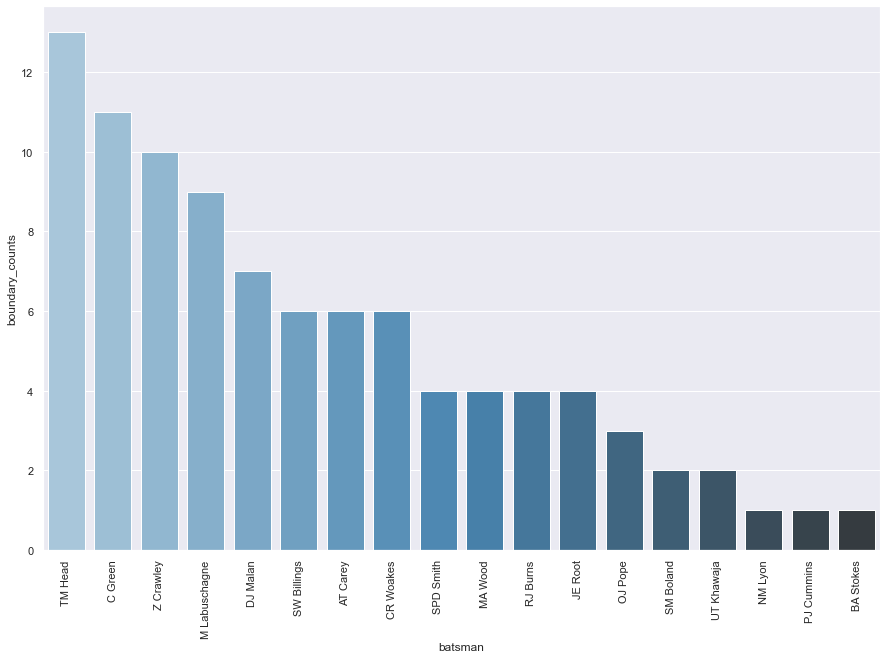

In [8]:
sns.set_theme(style='darkgrid')
df = pd.DataFrame(all_fours.batsman_name.value_counts()).rename(columns={'batsman_name': 'boundary_counts'})
df['batsman'] = df.index
df.reset_index(drop=True, inplace=True)
fig_dims = (15,10)
fig,ax = plt.pyplot.subplots(figsize=fig_dims)
bar = sns.barplot(data=df, x='batsman', y='boundary_counts', palette='Blues_d', ax=ax)
x_labels = bar.get_xticklabels();
bar.set_xticklabels(x_labels, rotation=90);

d:\Documents\Cricket\data_analysis\cricket_data_analysis\codebase\analysis_functions.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comms["batsmanName"] = comms["batsmanPlayerId"].map(player_map)
d:\Documents\Cricket\data_analysis\cricket_data_analysis\codebase\analysis_functions.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comms["bowlerName"] = comms["bowlerPlayerId"].map(player_map)


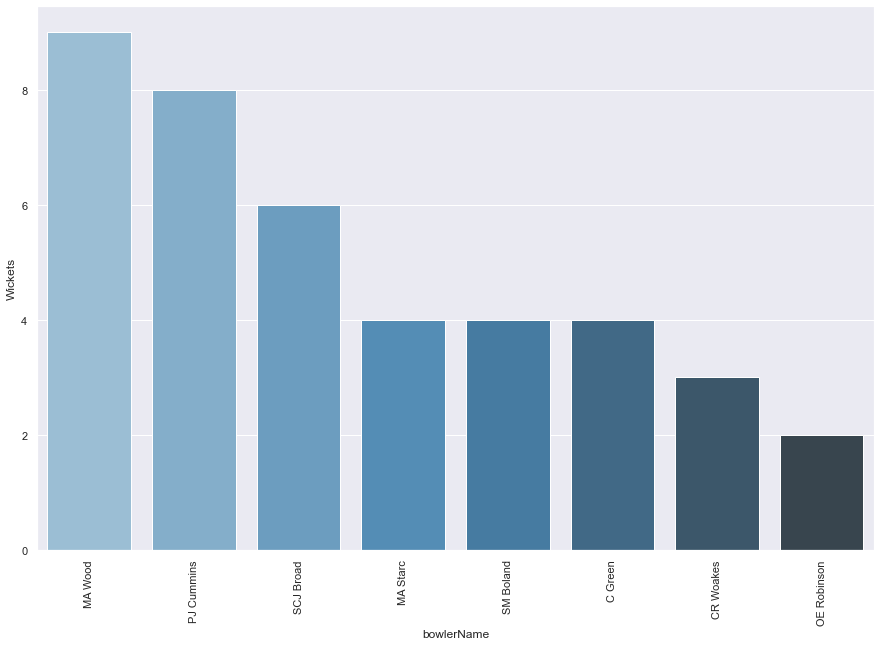

In [9]:
af.get_player_map(m)
wickets = af.get_balls_event(fifth_ashes_test, 'isWicket', True)
af.map_players(m, wickets)
wickets_df = af.series_to_df(wickets.bowlerName.value_counts(), ['bowlerName', 'Wickets'])
af.graph_seaborn_barplot(wickets_df, 'bowlerName', 'Wickets');

,bowler,wickets
0,MA Wood,9
1,PJ Cummins,8
2,SCJ Broad,6
3,MA Starc,4
4,SM Boland,4
5,C Green,4
6,CR Woakes,3
7,OE Robinson,2


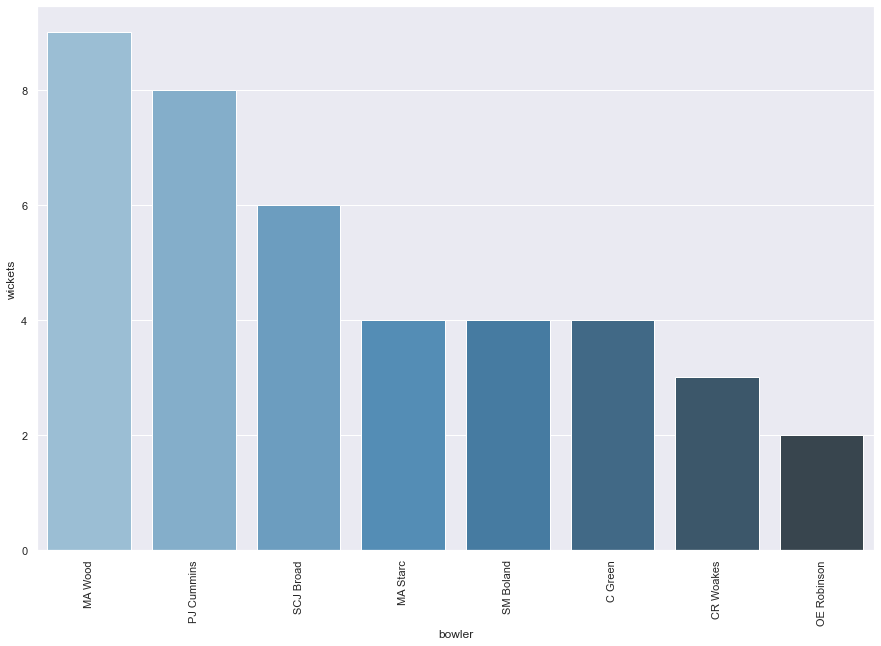

In [10]:
af.get_aggregates(m, 'wickets')

,batsman,bat-fours
0,TM Head,13
1,C Green,11
2,Z Crawley,10
3,M Labuschagne,9
4,DJ Malan,7
5,SW Billings,6
6,AT Carey,6
7,CR Woakes,6
8,SPD Smith,4
9,MA Wood,4


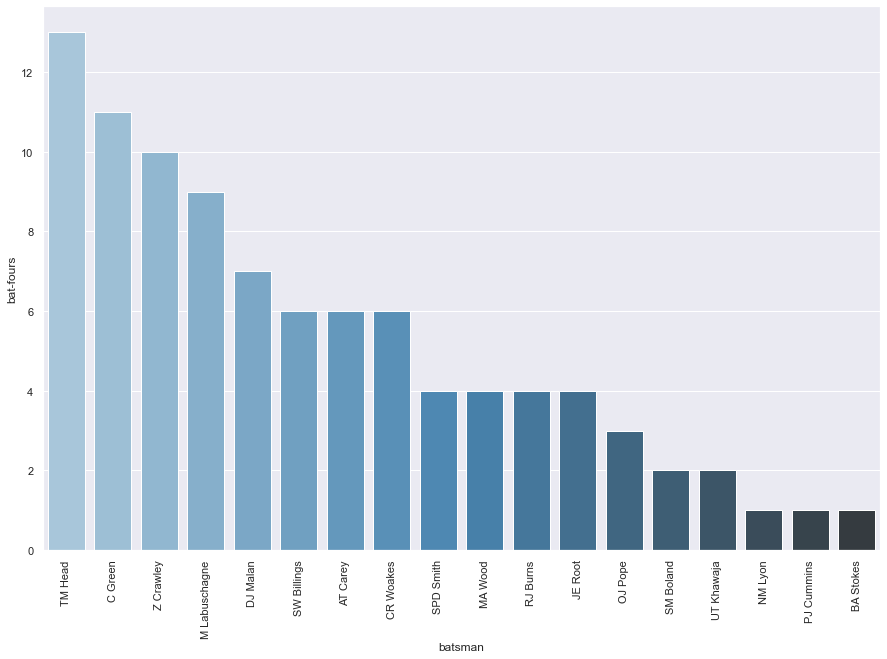

In [11]:
af.get_aggregates(m, 'bat-fours')

,bowler,bowl-sixes
0,MA Wood,3
1,C Green,1


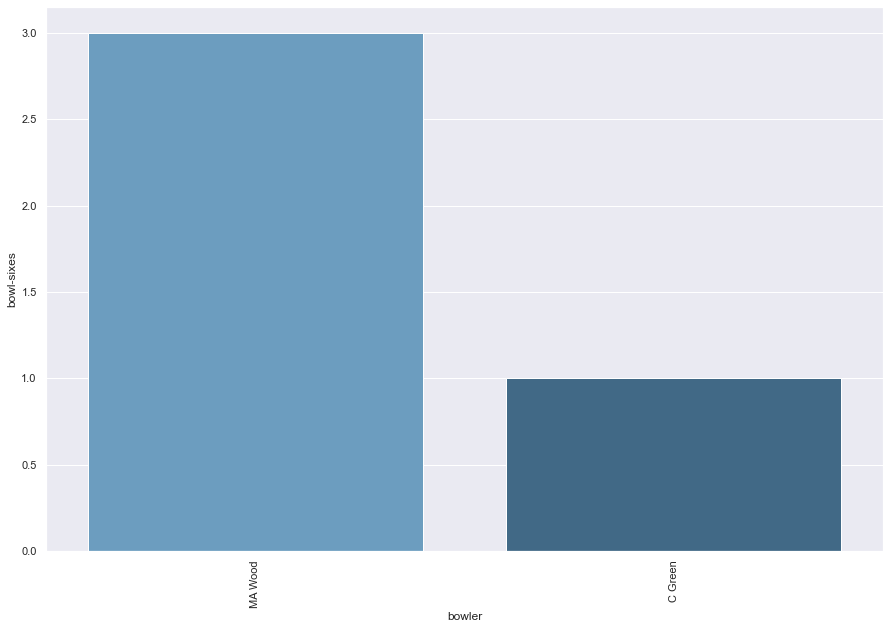

In [12]:
af.get_aggregates(m, 'bowl-sixes')

,batsman,bat-runs
0,DA Warner,0
1,OE Robinson,0
2,SCJ Broad,1
3,MA Starc,4
4,BA Stokes,9
5,PJ Cummins,15
6,UT Khawaja,17
7,SM Boland,18
8,OJ Pope,19
9,RJ Burns,26


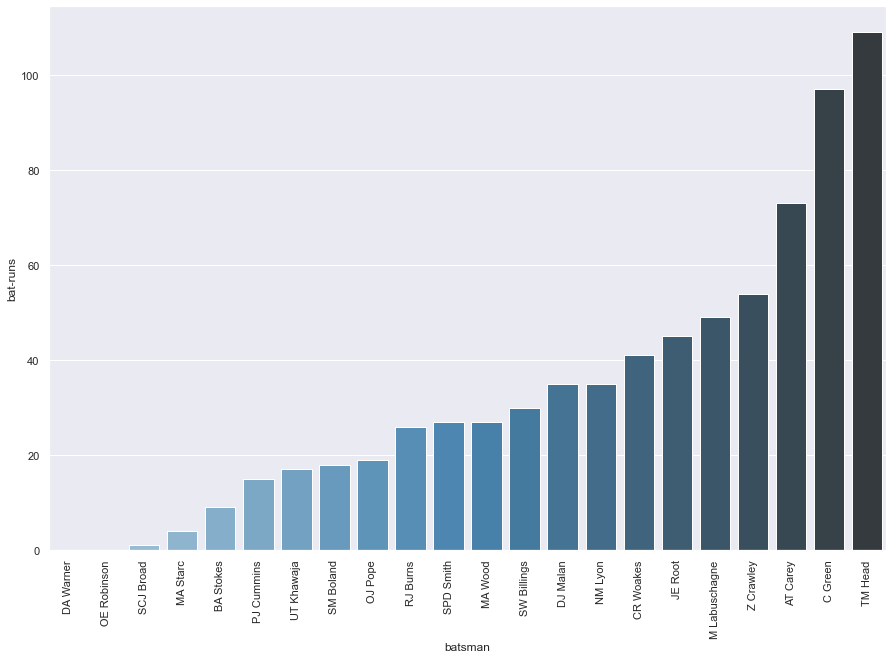

In [13]:
event_df = af.get_aggregates(m, 'bat-runs')
event_df

,bowler,bowl-runs
0,JE Root,35
1,OE Robinson,47
2,SM Boland,51
3,C Green,66
4,MA Starc,83
5,PJ Cummins,87
6,CR Woakes,104
7,SCJ Broad,110
8,MA Wood,152


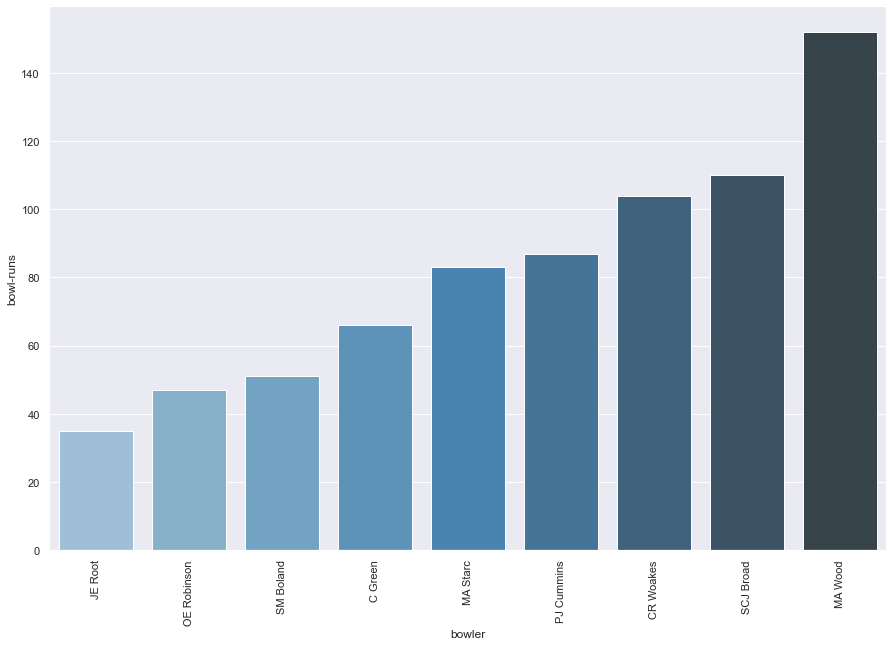

In [14]:
af.get_aggregates(m, 'bowl-runs')

In [18]:
test_comms = fifth_ashes_test.copy()
af.process_text_comms(test_comms)
test_comms.head()

,_uid,id,inningNumber,oversUnique,oversActual,overNumber,ballNumber,totalRuns,batsmanRuns,isFour,...,bowlerPlayerId,totalInningRuns,title,dismissalText,commentPreTextItems,commentTextItems,commentPostTextItems,commentVideos,events,over
0,35823879,35823879,1,0.01,0.1,1,1,0,0,False,...,48440,0,Broad to Warner,None,"Almost ready, folks. How will this play out? D...","<strong>padded up first ball</strong>, Broad t...",None,None,[],None
1,35823880,35823880,1,0.02,0.2,1,2,0,0,False,...,48440,0,Broad to Warner,None,None,"full, angling into the pads, defended to mid-on",None,None,[],None
2,35823882,35823882,1,0.03,0.3,1,3,0,0,False,...,48440,0,Broad to Warner,None,None,"full outside off, 129kph, left alone",None,None,[],None
3,35823883,35823883,1,0.04,0.4,1,4,0,0,False,...,48440,0,Broad to Warner,None,None,"pushed up fuller outside off, Warner gets forw...",None,None,[],None
4,35823885,35823885,1,0.05,0.5,1,5,0,0,False,...,48440,0,Broad to Warner,None,None,"back of a length outside off, hint of seam mov...",Broad has some issues with the crease,None,[],None


In [33]:
print(test_comms.iloc[0,24])
af.remove_html(test_comms.iloc[0,24])

<strong>padded up first ball</strong>, Broad tumbles over and slides down the pitch! A strangled appeal for lbw by those who stayed on their feet! Marginally ridiculous start. Too high for lbw
['<strong>', '</strong>']


'padded up first ball, Broad tumbles over and slides down the pitch! A strangled appeal for lbw by those who stayed on their feet! Marginally ridiculous start. Too high for lbw'

In [16]:
print(test_comms.iloc[0,2])

[{'type': 'HTML', 'html': '<strong>padded up first ball</strong>, Broad tumbles over and slides down the pitch! A strangled appeal for lbw by those who stayed on their feet! Marginally ridiculous start. Too high for lbw'}]


In [17]:
comment_example = test_comms.iloc[0,2]

In [18]:
type(comment_example[0])

dict

In [19]:
html_coms = test_comms.iloc[:,2].to_frame()
html_coms['type'] = html_coms['commentTextItems'].map(type)

In [20]:
html_coms = html_coms[html_coms['type'] != html_coms.iloc[0,1]]
html_coms

,commentTextItems,type
324,None,<class 'NoneType'>


In [38]:
test_comms = af.pre_transform_comms(m)
test_comms.head()

,_uid,id,inningNumber,ballsActual,ballsUnique,oversUnique,oversActual,overNumber,ballNumber,totalRuns,...,dismissalText,commentPreTextItems,commentTextItems,commentPostTextItems,commentVideos,events,over,batsmanName,bowlerName,bowlerRuns
0,35823879,35823879,1,None,None,0.01,0.1,1,1,0,...,None,"Almost ready, folks. How will this play out? D...","padded up first ball, Broad tumbles over and s...",None,None,[],None,DA Warner,SCJ Broad,0
1,35823880,35823880,1,None,None,0.02,0.2,1,2,0,...,None,None,"full, angling into the pads, defended to mid-on",None,None,[],None,DA Warner,SCJ Broad,0
2,35823882,35823882,1,None,None,0.03,0.3,1,3,0,...,None,None,"full outside off, 129kph, left alone",None,None,[],None,DA Warner,SCJ Broad,0
3,35823883,35823883,1,None,None,0.04,0.4,1,4,0,...,None,None,"pushed up fuller outside off, Warner gets forw...",None,None,[],None,DA Warner,SCJ Broad,0
4,35823885,35823885,1,None,None,0.05,0.5,1,5,0,...,None,None,"back of a length outside off, hint of seam mov...",Broad has some issues with the crease,None,[],None,DA Warner,SCJ Broad,0
